In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
roc_a_fella = np.array([0] * 12 + [1] * 8)
roc_a_fella

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
four_ad = np.array([0] * 95 + [1] * 31)
four_ad

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
n_bootstraps = 10**6

def bootstrap_proportion(data, n_bootstraps=n_bootstraps):
    """Return array of sample means from bootstrapping n_samples times."""
    output = np.zeros(n_bootstraps)
    n = len(data)
    for i in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, 
                                            size=n,
                                            replace=True)
        output[i] = (bootstrap_sample.sum() / n)
    return output

In [5]:
roc_a_fella_dist = bootstrap_proportion(roc_a_fella, n_bootstraps)

In [6]:
four_ad_dist = bootstrap_proportion(four_ad, n_bootstraps)

Text(0.5, 0, '% Best New Music')

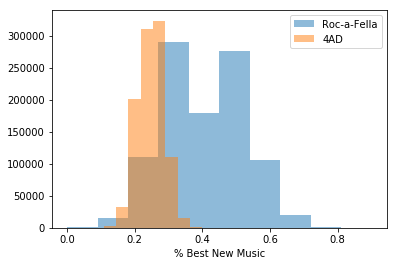

In [7]:
fig, ax = plt.subplots()
ax.hist(roc_a_fella_dist, alpha=.5, label='Roc-a-Fella')
ax.hist(four_ad_dist, alpha=.5, label='4AD')
ax.legend()
ax.set_xlabel("% Best New Music")

In [8]:
(roc_a_fella_dist < four_ad_dist).sum() / n_bootstraps

0.092698

In [9]:
np.percentile(roc_a_fella_dist, 10)

0.25

In [10]:
np.percentile(roc_a_fella_dist, 90)

0.55